In [18]:
projectDir = paths.concat(os.getenv('HOME'),'code/multi-human-pose/')
paths.dofile(projectDir .. '/train/src/ref.lua')

## Generate an example training sample

378830	


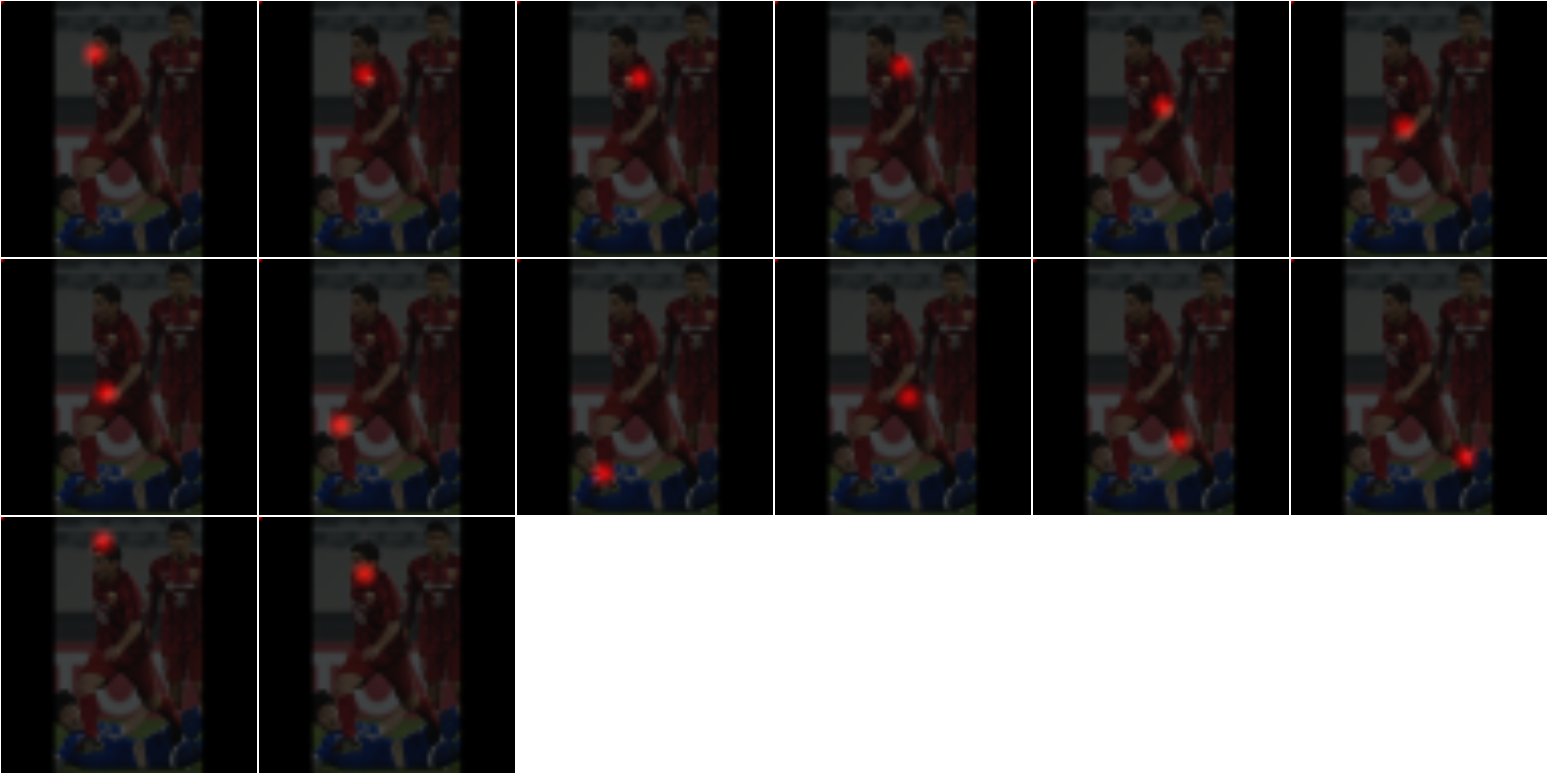

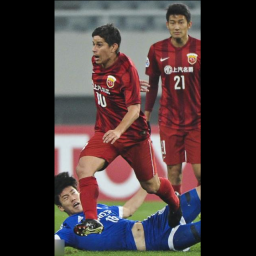

In [19]:
local set = 'valid'
local tmpIdx = opt.idxRef[set][torch.random(dataset:size(set))]
print(tmpIdx)
inp,hms = heatmapVisualization(set,tmpIdx)
itorch.image(inp)
itorch.image(hms)

## Check out some predictions

In [ ]:
paths.dofile(projectDir .. '/train/src/ref.lua')
idxs, preds, hms, inp = loadPreds('ai-cha/finetune-PyraNet/preds', true, false)

In [ ]:
local tmpIdx = torch.random(idxs:size(1))
local img = dataset:loadImage(idxs[tmpIdx]) -- Load original image
drawSkeleton(img, preds[tmpIdx]:narrow(2,1,2):clone(), preds[tmpIdx]:narrow(2,5,1):clone():view(-1))

print("Predicted pose:"); sys.sleep(.01)
itorch.image(img); sys.sleep(.01)

if hms then
    -- Prepare heatmap visualization
    local hmImg = heatmapVisualization(nil,idxs[tmpIdx],hms[tmpIdx])
    print("Heatmaps: (red - ground truth, blue - predicted)"); sys.sleep(.01)
    itorch.image(hmImg)
end


In [ ]:
require 'hdf5'
ffi = require 'ffi'
annot = {}
new_h5 = '/home/yuliang/code/multi-human-pose/train/data/ai-cha/annot.h5'
tags =  {'ids', 'person', 'visible', 'imgname', 'part', 'bndbox'}
a = hdf5.open(new_h5,'r')
for _,tag in ipairs(tags) do annot[tag] = a:read(tag):all() end
a:close()
annot.part:add(1)

In [ ]:
print(ffi.string(annot.imgname[1]:char():data()):sub(1,40)..'.jpg')

In [ ]:
print(annot.bndbox[1][1][1])

In [ ]:
-- /home/yuliang/code/multi-human-pose/train/data
require 'hdf5'
ffi = require 'ffi'
annot = {}
new_h5 = '/home/yuliang/code/multi-human-pose/train/data/mpii-box/annot.h5'
tags = {'imgname','part','bndbox','mu','std'}
a = hdf5.open(new_h5,'r')
for _,tag in ipairs(tags) do annot[tag] = a:read(tag):all() end
a:close()
annot.part:add(1)

In [ ]:
print(ffi.string(annot.imgname[1]:char():data()))

In [ ]:
img = image.load(paths.concat('/home/yuliang/code/multi-human-pose/train/data/mpii-box','images',ffi.string(annot.imgname[1]:char():data())))
itorch.image(img)
print(#img)

In [ ]:
print(annot.mu[3])

In [ ]:
a = torch.Tensor(3,746,746)
print(a:sub(1,3,1,746,233,512))

In [ ]:
function split(pString, pPattern)
   local Table = {}  -- NOTE: use {n = 0} in Lua-5.0
   local fpat = "(.-)" .. pPattern
   local last_end = 1
   local s, e, cap = pString:find(fpat, 1)
   while s do
      if s ~= 1 or cap ~= "" then
     table.insert(Table,cap)
      end
      last_end = e+1
      s, e, cap = pString:find(fpat, last_end)
   end
   if last_end <= #pString then
      cap = pString:sub(last_end)
      table.insert(Table, cap)
   end
   return Table
end

In [ ]:
a = "test@@@"
print(split(a,'@')[1])